In [2]:
import warnings
warnings.simplefilter(action="ignore",category=FutureWarning)

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


In [4]:
gpus = tf.config.list_physical_devices('GPU')
gpus

2022-06-18 07:11:20.676693: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-18 07:11:20.838410: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-18 07:11:20.838900: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [5]:
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        print(e)

1 Physical GPUs, 1 Logical GPUs


2022-06-18 07:12:04.793371: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-18 07:12:04.793869: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-18 07:12:04.794247: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-18 07:12:05.523525: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-18 07:12:05.523826: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read f

In [6]:
dataset=pd.read_csv('Churn_Modelling.csv')
X=dataset.iloc[:,3:13]
Y=dataset.iloc[:,13]

In [5]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [6]:
X.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

In [7]:
X=X.drop(['Geography','Gender'],axis=1)
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [8]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.20,random_state=1)

In [9]:
scaler=StandardScaler()
xtrain=scaler.fit_transform(xtrain)
xtest=scaler.transform(xtest)

In [10]:
import tensorflow.keras
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.models import Sequential


In [11]:
%%time
Classifier=Sequential()
Classifier.add(Dense(units=6,activation='relu',kernel_initializer='he_uniform',input_shape=(8,)))
Classifier.add(Dense(units=6,activation='relu',kernel_initializer='he_uniform'))
Classifier.add(Dense(units=1,activation='sigmoid',kernel_initializer='glorot_uniform'))
Classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

model_history=Classifier.fit(xtrain,ytrain,batch_size=10,epochs=100,validation_split=0.33)


Epoch 1/100
536/536 [==============================] - 3s 4ms/step - loss: 0.4917 - accuracy: 0.7880 - val_loss: 0.4627 - val_accuracy: 0.8031
Epoch 2/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4527 - accuracy: 0.8033 - val_loss: 0.4501 - val_accuracy: 0.7982
Epoch 3/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4420 - accuracy: 0.8065 - val_loss: 0.4427 - val_accuracy: 0.8039
Epoch 4/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4344 - accuracy: 0.8123 - val_loss: 0.4357 - val_accuracy: 0.8103
Epoch 5/100
536/536 [==============================] - 2s 4ms/step - loss: 0.4292 - accuracy: 0.8143 - val_loss: 0.4340 - val_accuracy: 0.8107
Epoch 6/100
536/536 [==============================] - 2s 4ms/step - loss: 0.4254 - accuracy: 0.8199 - val_loss: 0.4287 - val_accuracy: 0.8152
Epoch 7/100
536/536 [==============================] - 2s 4ms/step - loss: 0.4214 - accuracy: 0.8238 - val_loss: 0.4255 - val_accuracy: 0.8183

In [12]:
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


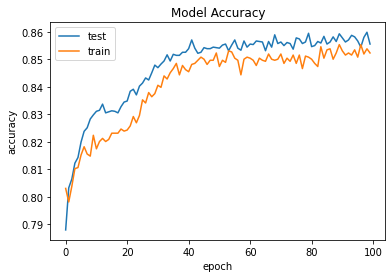

In [14]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['test','train'],loc='upper left')
plt.show()

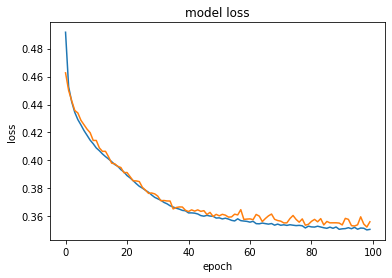

In [15]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [16]:
ypred=Classifier.predict(xtest)
ypred=ypred>0.5

In [17]:
accuracy=accuracy_score(ytest,ypred)*100
print(accuracy)

85.0
